In [ ]:
#Firstly I Am Inserting All the Necessary Libraries for the analysis
# import io
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *


# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# python imports
import re
import json
import os
from collections import Counter
import datetime as dt

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook


# Saving models
import pickle


In [5]:
import pandas as pd #Importing dataset into jupyter notebook

df_c = pd.read_csv('C:/Users/nikhi/OneDrive/Desktop/covid19_tweets.csv')

In [6]:
df_c.head(10) #seeing the dataset as to was it look likes

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,NaN,NaN,2012-02-03 18:08:10,608,355,95,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,NaN,TweetDeck,False
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25,29,18,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201,34239,29802,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


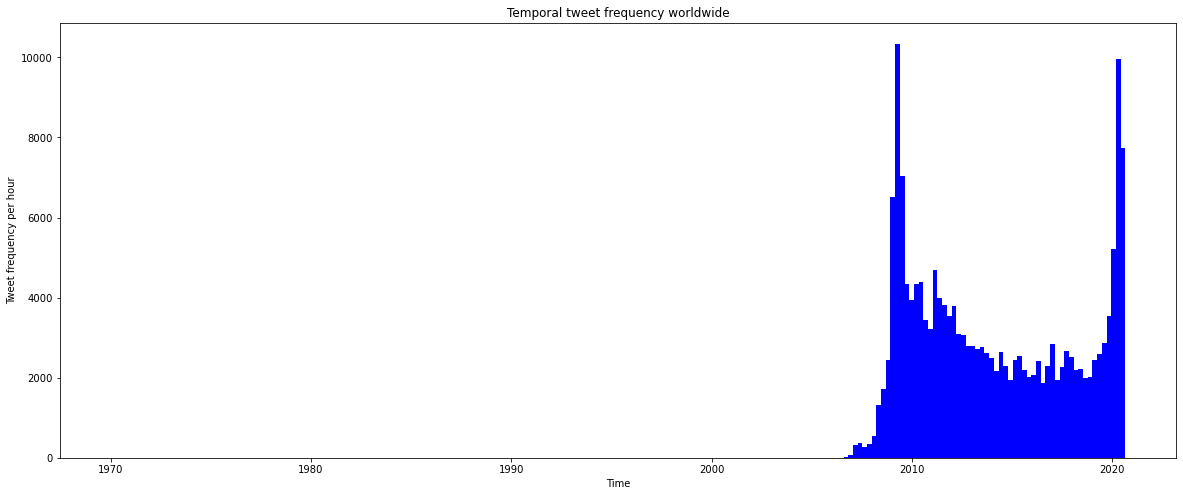

In [8]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(title='Temporal tweet frequency worldwide', xlabel='Time', ylabel='Tweet frequency per hour')
plt.hist(pd.to_datetime(df_c.user_created), bins = 24*9, color = 'b')
plt.show() # This Graph Showcases when most of the tweets were done on the basis of user has tweeted 

In [9]:
text_en = df_c['text'] #then we are focusing on the tweet part of the text.

In [10]:
text_en_lr = text_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
text_en_lr.head() # Cleaning is started in this and now we are cleaning the URL like http etc in this

0    If I smelled the scent of hand sanitizers toda...
1    Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv The one gift #COVID19 has give me...
4    25 July : Media Bulletin on Novel #CoronaVirus...
Name: text, dtype: object

In [11]:
text_en_lr_lc = text_en_lr.apply(lambda x: x.lower())
text_en_lr_lc.head() #here we are putting everything in the lowercase to make it more presentable 
#Could have use Texthero but step wise cleaning makes learning more

0    if i smelled the scent of hand sanitizers toda...
1    hey @yankees @yankeespr and @mlb - wouldn't it...
2    @diane3443 @wdunlap @realdonaldtrump trump nev...
3    @brookbanktv the one gift #covid19 has give me...
4    25 july : media bulletin on novel #coronavirus...
Name: text, dtype: object

In [12]:
text_en_lr_lc_pr = text_en_lr_lc.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
text_en_lr_lc_pr.head() # in this snippet we are removing punctuations like single inverted commas ,commas etc.

0    if i smelled the scent of hand sanitizers toda...
1    hey yankees yankeespr and mlb  wouldnt it have...
2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv the one gift covid19 has give me i...
4    25 july  media bulletin on novel coronavirusup...
Name: text, dtype: object

In [14]:
import nltk
nltk.download('stopwords') # imp0rting stopwords library

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])

text_en_lr_lc_pr_sr = text_en_lr_lc_pr.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text_en_lr_lc_pr_sr.head() #removing various stopwords in the text part as all these have same meaning

0    smelled scent hand sanitizers today someone pa...
1    hey yankees yankeespr mlb wouldnt made sense p...
2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv one gift give appreciation simple ...
4    25 july media bulletin novel coronavirusupdate...
Name: text, dtype: object

In [31]:
word_list = [word for line in text_en_lr_lc_pr_sr for word in line.split()]
word_list[:10] #Concatenating all the tweets into a list of words

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated']

In [30]:
text_en_lr_lc_pr_sr.head()

0    smelled scent hand sanitizers today someone pa...
1    hey yankees yankeespr mlb wouldnt made sense p...
2    diane3443 wdunlap realdonaldtrump trump never ...
3    brookbanktv one gift give appreciation simple ...
4    25 july media bulletin novel coronavirusupdate...
Name: text, dtype: object

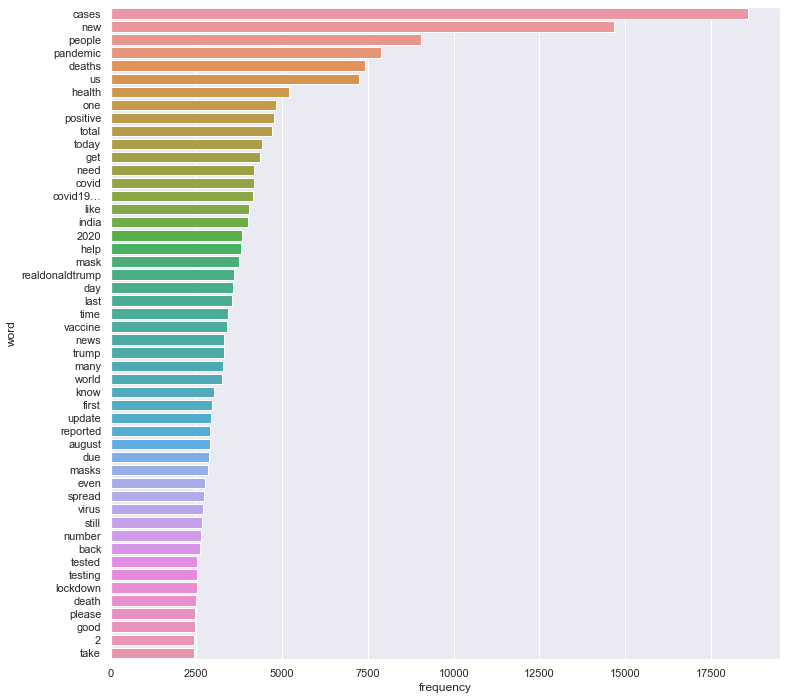

In [18]:
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df) #Calculating the Term Frequency that tells most number of words used in a tweet
plt.savefig('wordcount_bar.png')

In [37]:
null_values_df = df_c.isnull().sum()
null_values_df1 = pd.DataFrame(data=null_values_df.index,columns=['Feature'])
null_values_df2 = pd.DataFrame(data=null_values_df.values,columns=['value'])
remove_null_values_df = pd.concat([null_values_df1,null_values_df2],axis=1)
p = remove_null_values_df[remove_null_values_df['value'] > 0]
p

,Feature,value
1,user_location,36771
2,user_description,10286
10,hashtags,51334
11,source,77


Text(0.5, 1.0, 'Missing Values')

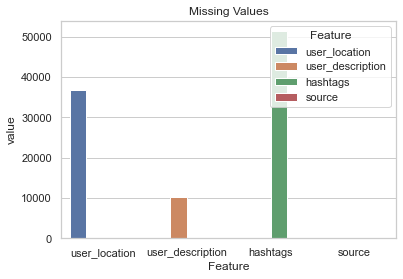

In [38]:
#plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
sns.barplot(x = 'Feature',y= 'value',hue='Feature',data=p) # we can see there are many missing values in this so there is less polarity scores because of this
plt.title('Missing Values')

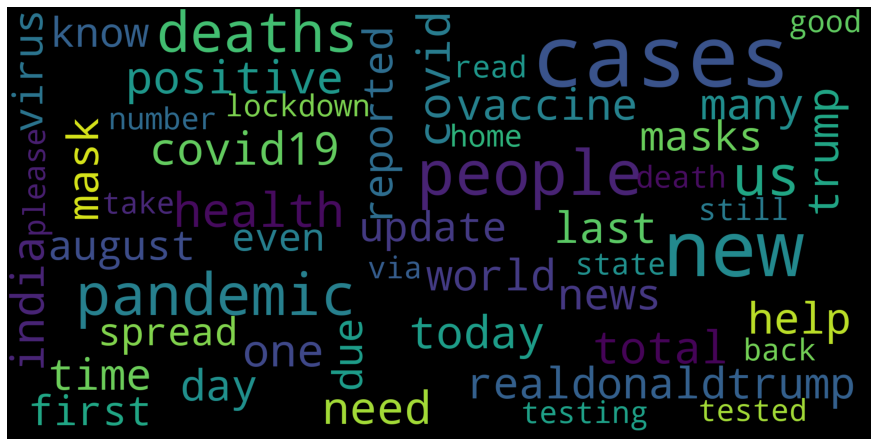

In [19]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(word_list))


plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')     # this shows the above same thing with the most number words coming the bigger text like cases

In [21]:
import nltk
nltk.download('vader_lexicon') #Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...


True

In [22]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = text_en_lr_lc_pr_sr.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))        #Getting the polarity scores for each tweet meaning getting tweet is positive negative etc to get a better sense
sent_scores_df.tail()

,neg,neu,pos,compound
179103,0.000,0.588,0.412,0.4939
179104,0.435,0.235,0.329,-0.2263
179105,0.234,0.584,0.182,-0.2023
179106,0.000,0.660,0.340,0.5574
179107,0.355,0.645,0.000,-0.5267


In [23]:
sent_scores_df['val'] = sent_scores_df['compound'].apply(lambda x: 'neutral' if x == 0 else ('positive' if x > 0 else 'negative'))
sent_scores_df.head() #Classifying the scores based on the compiund polarity value 

,neg,neu,pos,compound,val
0,0.00,0.758,0.242,0.4939,positive
1,0.11,0.709,0.181,0.2263,positive
2,0.00,0.832,0.168,0.2057,positive
3,0.00,0.563,0.437,0.7351,positive
4,0.00,0.796,0.204,0.3182,positive


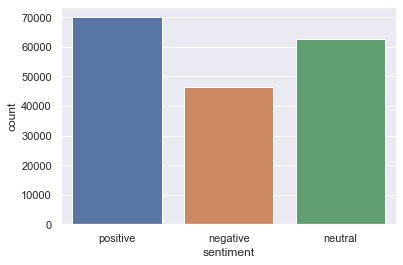

In [24]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png') # graphical represenation of the  polarity scores

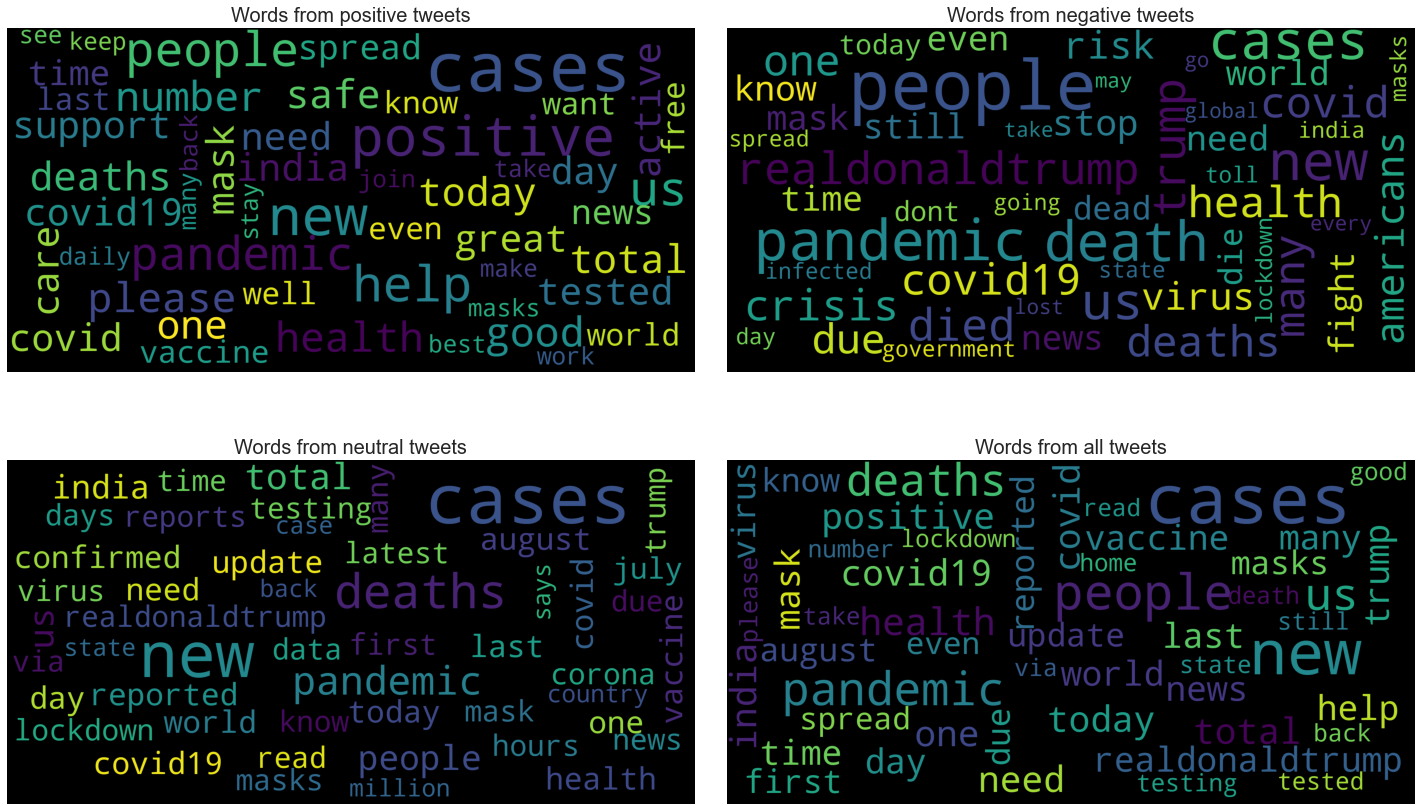

In [29]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = text_en_lr_lc_pr_sr
polar_tweets_df['polarity'] = sent_scores_df['val']

positive = polar_tweets_df[polar_tweets_df['polarity'] == 'positive']['tweet']
negative = polar_tweets_df[polar_tweets_df['polarity'] == 'negative']['tweet']
neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'neutral']['tweet']

positive_list = [word for line in positive for word in line.split()]
negative_list = [word for line in negative for word in line.split()]
neutral_list = [word for line in neutral for word in line.split()]

positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,                          # This Word Cloud shows Positive, Negative  Neutral and all tweets based on
    normalize_plurals=False                      #polarity scores with words occuring most appearing bigger in size
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40, 
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))
fig, axs = plt.subplots(2, 2, figsize = (20, 12))

fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
axs[0, 1].axis('off')

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all tweets', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')